<a href="https://colab.research.google.com/github/susanjax/Project_Genetic_Algorithm/blob/main/part_3_1_LGBM_model_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import lightgbm
from sklearn import metrics
import warnings
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/toxicity_project/data/transformed/scaled_original_material_cell.csv')

In [ ]:
dft = pd.read_csv('/content/drive/MyDrive/toxicity_project/data/transformed/scaled_external_material_cell.csv')

In [ ]:
df

,Unnamed: 0,tissue,cell line,disease,material,morphology,cell type,organism,test,amw,...,mcd,CrippenClogP,Valance_electron,chi1v,chi2v,electronegativity,Zeta potential (mV),kappa1,chi0v,viability (%)
0,0,4.0,0.0,11.0,2.0,8.0,1.0,0.0,10.0,0.841234,...,-0.869413,0.578770,-0.453121,-0.776045,-0.251567,-0.038464,-0.018609,-0.202007,-0.266858,36.126
1,1,4.0,0.0,11.0,2.0,8.0,1.0,0.0,10.0,0.841234,...,-0.869413,0.578770,-0.453121,-0.776045,-0.251567,-0.038464,-0.836725,-0.202007,-0.266858,22.253
2,2,4.0,0.0,11.0,2.0,8.0,1.0,0.0,10.0,0.841234,...,-0.869413,0.578770,-0.453121,-0.776045,-0.251567,-0.038464,-0.778818,-0.202007,-0.266858,19.643
3,3,4.0,0.0,11.0,2.0,8.0,1.0,0.0,10.0,0.841234,...,-0.869413,0.578770,-0.453121,-0.776045,-0.251567,-0.038464,-0.369475,-0.202007,-0.266858,91.262
4,4,4.0,0.0,11.0,2.0,8.0,1.0,0.0,10.0,0.841234,...,-0.869413,0.578770,-0.453121,-0.776045,-0.251567,-0.038464,0.954115,-0.202007,-0.266858,87.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,3111,5.0,73.0,2.0,6.0,11.0,0.0,4.0,10.0,0.546648,...,0.639724,0.059492,-0.084818,1.580465,-0.251567,0.374527,-1.041253,-0.103262,0.825563,63.246
3025,3112,5.0,73.0,2.0,6.0,11.0,0.0,4.0,10.0,0.546648,...,0.639724,0.059492,-0.084818,1.580465,-0.251567,0.374527,-0.114170,-0.103262,0.825563,102.630
3026,3113,5.0,73.0,2.0,6.0,11.0,0.0,4.0,10.0,0.546648,...,0.639724,0.059492,-0.084818,1.580465,-0.251567,0.374527,1.009170,-0.103262,0.825563,107.880
3027,3114,5.0,73.0,2.0,6.0,11.0,0.0,4.0,10.0,0.546648,...,0.639724,0.059492,-0.084818,1.580465,-0.251567,0.374527,-0.134709,-0.103262,0.825563,106.440


In [ ]:
dft

,Unnamed: 0,tissue,cell line,disease,material,morphology,cell type,organism,test,amw,...,mcd,CrippenClogP,Valance_electron,chi1v,chi2v,electronegativity,Zeta potential (mV),kappa1,chi0v,viability (%)
0,131,14.0,5.0,1.0,15.0,2.0,1.0,0.0,9.0,-0.781260,...,1.953233,-0.781601,-0.084818,0.195029,-0.251567,1.222245,-1.064074,-0.154470,-0.350073,100.0
1,132,14.0,5.0,1.0,15.0,2.0,1.0,0.0,9.0,-0.781260,...,1.953233,-0.781601,-0.084818,0.195029,-0.251567,1.222245,-1.064074,-0.154470,-0.350073,96.0
2,133,14.0,5.0,1.0,15.0,2.0,1.0,0.0,9.0,-0.781260,...,1.953233,-0.781601,-0.084818,0.195029,-0.251567,1.222245,-1.064074,-0.154470,-0.350073,90.0
3,134,14.0,5.0,1.0,15.0,2.0,1.0,0.0,9.0,-0.781260,...,1.953233,-0.781601,-0.084818,0.195029,-0.251567,1.222245,-1.064074,-0.154470,-0.350073,60.0
4,135,14.0,5.0,1.0,15.0,2.0,1.0,0.0,9.0,-0.781260,...,1.953233,-0.781601,-0.084818,0.195029,-0.251567,1.222245,-1.064074,-0.154470,-0.350073,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2497,4.0,59.0,2.0,17.0,2.0,1.0,0.0,1.0,-0.528729,...,-0.003374,0.316370,-0.674102,0.413273,-0.251567,-0.022162,0.550477,-0.171844,0.620069,60.0
83,2498,4.0,59.0,2.0,17.0,2.0,1.0,0.0,1.0,-0.528729,...,-0.003374,0.316370,-0.674102,0.413273,-0.251567,-0.022162,0.550477,-0.171844,0.620069,55.0
84,2499,4.0,59.0,2.0,17.0,2.0,1.0,0.0,1.0,-0.528729,...,-0.003374,0.316370,-0.674102,0.413273,-0.251567,-0.022162,0.550477,-0.171844,0.620069,30.0
85,2500,4.0,59.0,2.0,17.0,2.0,1.0,0.0,1.0,-0.528729,...,-0.003374,0.316370,-0.674102,0.413273,-0.251567,-0.022162,0.550477,-0.171844,0.620069,25.0


In [ ]:
x = df.drop(['viability (%)', 'material', 'Unnamed: 0'], axis=1) 
y = df[['viability (%)']].copy()
xt = dft.drop(['viability (%)', 'material', 'Unnamed: 0'], axis=1) 
yt = dft[['viability (%)']].copy()

In [ ]:
x.columns

Index(['tissue', 'cell line', 'disease', 'morphology', 'cell type', 'organism',
       'test', 'amw', 'lipinskiHBD', 'CrippenMR', 'NumRotatableBonds',
       'Hydrodynamic diameter (nm)', 'hallKierAlpha', 'radii', 'lipinskiHBA',
       'concentration (ug/ml)', 'rox', 'labuteASA', 'NumHBA', 'mcd',
       'CrippenClogP', 'Valance_electron', 'chi1v', 'chi2v',
       'electronegativity', 'Zeta potential (mV)', 'kappa1', 'chi0v'],
      dtype='object')

In [ ]:
train_R2_metric_results = []
train_rmse_metric_results = []
train_mae_metric_results = []
test_R2_metric_results = []
test_rmse_metric_results = []
test_mae_metric_results = []

In [ ]:
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state = 42)

cv_scores = np.empty(10)
for idx, (train_indices, test_indices) in enumerate(cv.split(x, x[['amw']])):
    x_train, x_test = x.iloc[train_indices], x.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]


    model = lightgbm.LGBMRegressor(n_estimators= 1398,
                          learning_rate= 0.14892450981116276,
                          num_leaves= 14,
                          max_depth=23,
                          min_data_in_leaf=8,
                          lambda_l1 = 1,
                          lambda_l2 = 9,
                          bagging_fraction=.98,
                          bagging_freq=1,
                          feature_fraction=0.68,)
    lgb_model = model.fit(x_train, y_train)
    train_pred = lgb_model.predict(x_train)
    test_pred = lgb_model.predict(x_test)
    train_R2_metric_results.append(r2_score(y_train, train_pred))
    train_rmse_metric_results.append(mean_squared_error(y_train, train_pred))
    train_mae_metric_results.append(mean_absolute_error(y_train, train_pred))

    test_R2_metric_results.append(r2_score(y_test, test_pred))
    test_rmse_metric_results.append(mean_squared_error(y_test, test_pred))
    test_mae_metric_results.append(mean_absolute_error(y_test, test_pred))


In [ ]:

print("Train result (R-squared): ",  np.mean(train_R2_metric_results))
print("Train  result (RMSE): ", (np.mean(train_rmse_metric_results)) ** (1 / 2))
print("Train  result (MAE): ", (np.mean(train_mae_metric_results)))


Train result (R-squared):  0.9459165417308386
Train  result (RMSE):  6.872957489451597
Train  result (MAE):  4.1999033566613


In [ ]:

print("leave-one-out cross-validation result (R-squared): ", r2_score(y_test, test_pred))
print("10-fold cross-validation result (R-squared): ", np.mean(test_R2_metric_results))
print("10-fold cross-validation result (RMSE): ", (np.mean(test_rmse_metric_results)) ** (1 / 2))
print("10-fold cross-validation result (MAE): ", (np.mean(test_mae_metric_results)))


leave-one-out cross-validation result (R-squared):  0.7474851204143476
10-fold cross-validation result (R-squared):  0.7406919405095594
10-fold cross-validation result (RMSE):  14.929171566371885
10-fold cross-validation result (MAE):  10.182017030310158


In [ ]:
ext_test = model.predict(xt)
print('Mean Absolute Error:', metrics.mean_absolute_error(yt, ext_test))  
print('Mean Squared Error:', metrics.mean_squared_error(yt, ext_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yt, ext_test))) 
print("Regressor R2-score: ", r2_score(yt, ext_test))

Mean Absolute Error: 10.64126518694337
Mean Squared Error: 204.532024963566
Root Mean Squared Error: 14.301469328833523
Regressor R2-score:  0.6378449141297462


visualization

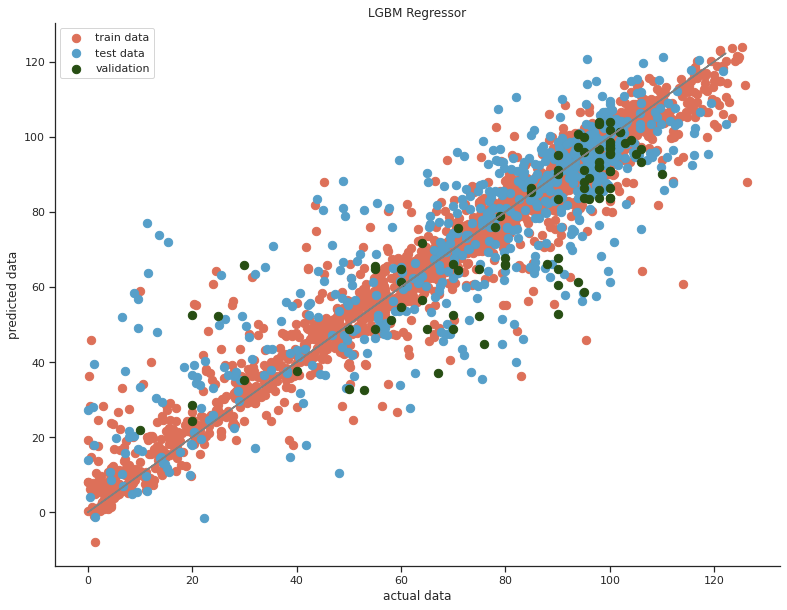

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))

plt.scatter(y_train, train_pred, color='#DD7059', s=70, label = 'train data')
plt.scatter(y_test, test_pred, color='#569FC9',s=70, label = 'test data')
plt.scatter(yt, ext_test, color='#274E13',s=70, label = 'validation')
plt.plot(y_test, y_test, color='gray')
plt.title('LGBM Regressor')
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.legend()
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.show()
# ax.figure.savefig("LGBM_regressor_with_external_data.png",transparent=True)

In [ ]:
df2 = dft[dft.material != 17]
specific_xval = df2.drop(['viability (%)', 'Unnamed: 0', 'material'], axis=1) 
specific_yval =df2[['viability (%)']]

removing dataset of ZnO as the original dataset does not have zeta potential these external dataset got. Removal of these datapoints increase the R2_score and reduced errors

In [ ]:
svalidation = model.predict(specific_xval)
print('Mean Absolute Error:', metrics.mean_absolute_error(specific_yval, svalidation))  
print('Mean Squared Error:', metrics.mean_squared_error(specific_yval, svalidation))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(specific_yval, svalidation))) 
print("Regressor R2-score: ", r2_score(specific_yval, svalidation))

Mean Absolute Error: 8.768845904480333
Mean Squared Error: 160.63112980935807
Root Mean Squared Error: 12.674033683455242
Regressor R2-score:  0.7250095825061471
